In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pd.read_csv("school_grades_dataset.csv").head()
# Based on the first five records, we find out what the data looks like and what categories it is divided into

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [5]:
school = pd.read_csv("school_grades_dataset.csv")
print(school.columns)
school_categorical_df = school.select_dtypes(include=['object'])
school_numerical_df = school.select_dtypes(include=['int64','float64'])

#Program prints the categories, data is divided into two groups

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [6]:
school_numerical_df.describe()
#Numerical categories are describred with: count of records, mean, standard deviationand by percent.

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


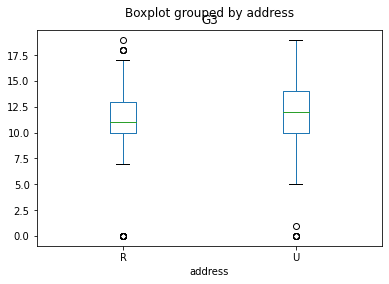

In [14]:
plt.boxplot=school.boxplot(column='G3',by='address',grid=False)
# Here we can see that students from city have better grade

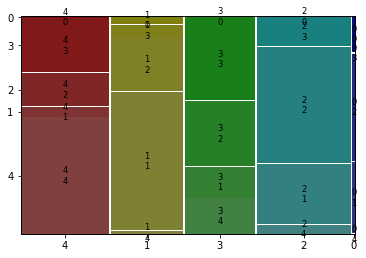

In [19]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(school, ['Medu','Fedu'])
plt.show()
# mosaic plot shows us which pair of data is the most popular

In [28]:
temp=school.loc[school['age']==17]
temp=temp.loc[temp['Medu']==4]
temp=temp.loc[temp['Fedu']==4]
temp.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,23.0,23.0,23.0,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000,23.000000,23.0000,23.000000,23.000000,23.000000,23.000000
mean,17.0,4.0,4.0,1.391304,1.826087,0.173913,4.173913,2.869565,3.130435,1.26087,2.217391,4.0000,3.608696,12.347826,12.434783,13.043478
std,0.0,0.0,0.0,0.583027,0.777652,0.650327,0.777652,1.013740,1.358621,0.68870,1.042572,1.3484,6.651993,2.036233,2.389867,2.653955
min,17.0,4.0,4.0,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.000000,1.0000,0.000000,7.000000,7.000000,8.000000
25%,17.0,4.0,4.0,1.000000,1.000000,0.000000,4.000000,2.000000,2.500000,1.00000,1.500000,3.5000,0.000000,11.500000,11.500000,12.000000
50%,17.0,4.0,4.0,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.00000,2.000000,5.0000,2.000000,13.000000,13.000000,13.000000
75%,17.0,4.0,4.0,2.000000,2.000000,0.000000,5.000000,3.500000,4.000000,1.00000,3.000000,5.0000,4.000000,13.500000,14.000000,15.000000
max,17.0,4.0,4.0,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000,4.00000,5.000000,5.0000,30.000000,15.000000,16.000000,17.000000


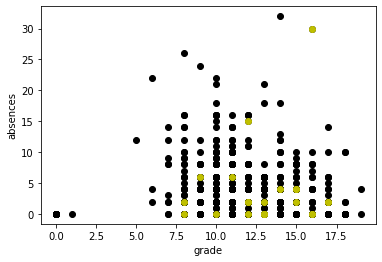

In [29]:
plt.scatter(school[['G3']].values , school[['absences']].values, c = 'k')
plt.scatter(temp[['G3']].values , temp[['absences']].values, c = 'y')
plt.ticklabel_format(axis='y', style="plain")
plt.xlabel('grade')
plt.ylabel('absences')
plt.show()
# We can see chosen data on The background of the rest

In [31]:
result = temp['G3']/temp['freetime']
temp = temp.assign(result = result)
temp.sort_values(by = ['result'],ascending=False).head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,result
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13,13.0
346,GP,M,17,U,LE3,T,4,4,other,teacher,home,father,2,1,0,no,no,no,no,yes,yes,yes,no,4,1,1,2,2,5,0,12,13,13,13.0
212,GP,F,17,U,GT3,T,4,4,services,teacher,home,mother,2,1,1,no,yes,no,no,yes,yes,yes,no,4,2,4,2,3,2,30,14,15,16,8.0
546,MS,F,17,U,GT3,T,4,4,health,health,course,father,1,2,0,no,yes,no,no,yes,yes,yes,no,5,2,5,1,1,5,0,13,15,16,8.0
210,GP,M,17,U,GT3,T,4,4,services,teacher,home,mother,1,1,0,no,no,no,no,yes,yes,yes,no,5,2,3,1,2,5,4,13,13,14,7.0
